## Telco Churn Analysis
-- -

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
# importing the dataframe
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`Observations`
- Total charges should be in float, but is in object dataform
- On opening the csv and we see that we have blanks too, hence it has object values
- we also are able to see that for those blank values in total charges it has 0 tenure, hence data may be blank.. we can replace it with NaNs or Nulls

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
# here we have first replaced all the blanks with 0
## then we have changed the datatype of this column to float

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# checking the nulls
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# we can check the sum of overall data's null also by
df.isnull().sum().sum()
# hence we understand that there are no null values

0

In [22]:
# describing the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


`Observations`
- here we understand that 25% of our data lies below 9 months of tenure
- similarly 50% of the data lies below 29 months
-  75% lies below 55 months

In [24]:
# Checking for duplicates in the data
df.duplicated().sum()

0

In [25]:
#as we saw, we do not have row-wise duplication here
## hence let's check for unique values i.e. customer wise
df["customerID"].duplicated().sum()

0

In [27]:
# in the describe we had seen that senior citizens was in numeric form, 
## hence let's convert that data too
# DEFINING A FUNCTION FOR THE SAME

def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

In [28]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
# applying the above function

In [34]:
df.head(30)
# here we see it as converted to Yes or no

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Now let us understand the churn i.e. how and when did the customer churned out

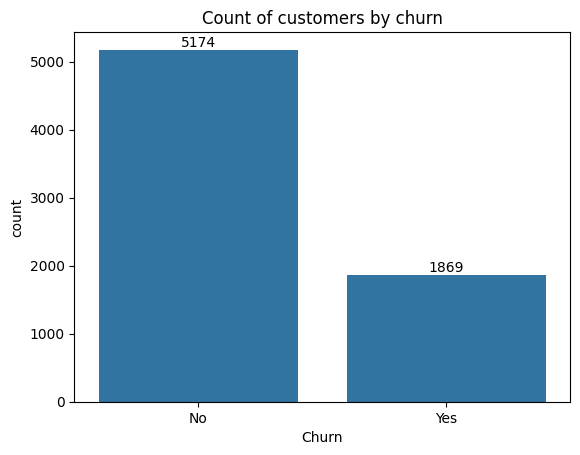

In [58]:
# using countplot
ax = sns.countplot(x = "Churn", data = df)

ax.bar_label(ax.containers[0]) # label of counts of the bar
plt.title("Count of customers by churn") # adding title
plt.show()

In [63]:
# here we can see that people who have stopped the telco services or have churnde out is 1869
# let us add the percentage value to the same
# using pie chart to show %

# plt.pie(df["Churn"])
# plt.show()

# the above one shows an error

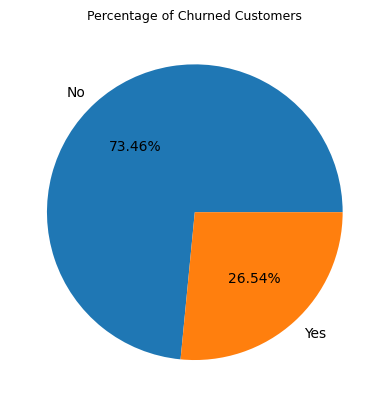

In [62]:
gb = df.groupby("Churn")["Churn"].count() # grouping by and counting churn
plt.pie(gb, labels = gb.index, autopct="%1.2f%%") # added lables and %
plt.title("Percentage of Churned Customers", fontsize = 9)
plt.show()

`Observation`
- Hence we can see that 26.54% customers have churned out


--> let's explore the reason behind it

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


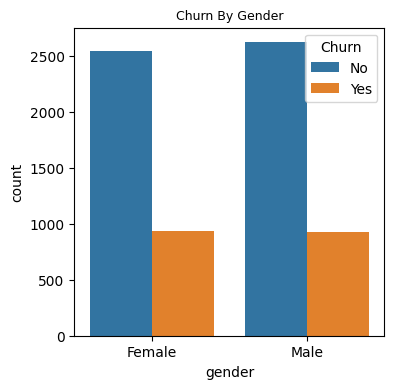

In [76]:
# Exploring things by gender

plt.figure(figsize = (4,4)) # resizing the image
sns.countplot(x = "gender", data = df , hue = "Churn")
# here we first took gender from the data and added hue of Churn
plt.title("Churn By Gender", fontsize = 9)
plt.show()

#here we can see that it regardless the gender, churn does not get affected
# hence not gender specific

`Obsrvation`
- The gender does not play a role in a customer churning out

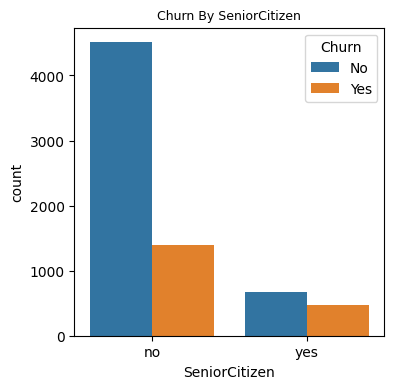

In [78]:
# Exploring the churn out by Senior Citizens

plt.figure(figsize = (4,4)) # resizing the image
sns.countplot(x = "SeniorCitizen", data = df , hue = "Churn")
plt.title("Churn By SeniorCitizen", fontsize = 9)
plt.show()

`Observation`
- Mostly Senior citizens are less, but we get to see that churnout is more when it comes to senior citizens

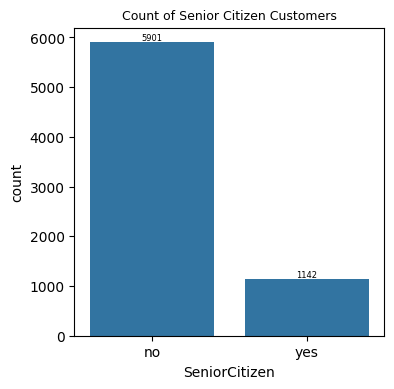

In [93]:
# Counting how many senior citizens we have

plt.figure(figsize = (4,4)) # resizing the image
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0], fontsize = 6)
plt.title("Count of Senior Citizen Customers", fontsize = 9)
plt.show()

<Figure size 400x400 with 0 Axes>

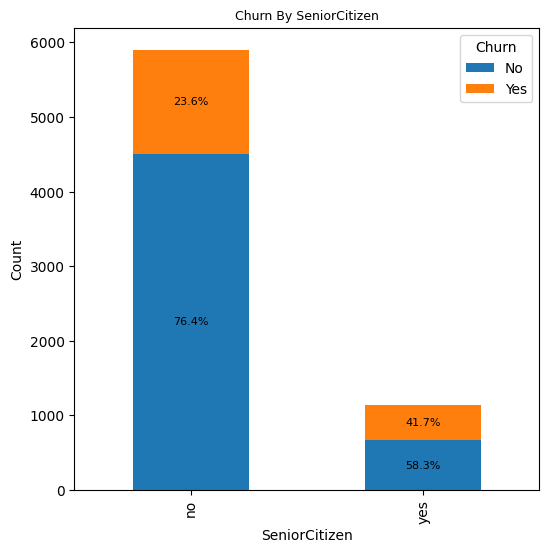

In [96]:
# making a stacked bar chart with percentages


# Setting the figure size
plt.figure(figsize=(4,4))
# Aggregating the counts based on 'SeniorCitizen' and 'Churn'
grouped_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
# .unstack() reshapes the data so that each value of "Churn" becomes its own column, 
## creating a DataFrame suitable for a stacked bar plot.

# Creating the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(6, 6))

# Adding percentage labels
for i, (index, row) in enumerate(grouped_data.iterrows()):
    total = row.sum()  # Total count for each 'SeniorCitizen' group
    bottom = 0  # Initialize the bottom of the bar for stacking

    for churn_value, count in row.items():
        percentage = (count / total) * 100
        # Adding the label at the center of each stacked section
        ax.text(i, bottom + count / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8, color='black')
        bottom += count  # Update the bottom for the next stack

plt.title("Churn By SeniorCitizen", fontsize=9)
plt.xlabel("SeniorCitizen")
plt.ylabel("Count")
plt.legend(title="Churn", loc='upper right')
plt.show()

### Understanding `.unstack()`

When you group the DataFrame using `df.groupby(['SeniorCitizen', 'Churn']).size()`, the grouped data looks like this:

| SeniorCitizen | Churn | Count |
|---------------|-------|-------|
| 0             | 0     | 100   |
| 0             | 1     | 50    |
| 1             | 0     | 30    |
| 1             | 1     | 20    |

- `"SeniorCitizen"` and `"Churn"` together form a multi-level index.
- The `"Count"` column shows the number of occurrences for each combination of `"SeniorCitizen"` and `"Churn"`.

#### Applying `.unstack()`

When `.unstack()` is applied, it pivots the `"Churn"` values (second level of the index) to become columns. The DataFrame transforms into:

| SeniorCitizen | 0   | 1   |
|---------------|-----|-----|
| 0             | 100 | 50  |
| 1             | 30  | 20  |

- The unique values from the `"Churn"` column (`0` and `1


### Step-by-Step Explanation of the Code

The code iterates through each row of the grouped DataFrame (`grouped_data`) to calculate the percentage of each category within the `"Churn"` column and then places these percentages as labels on the stacked bar chart.

#### Code Explanation

1. **`for i, (index, row) in enumerate(grouped_data.iterrows()):`**
   - This line uses `enumerate()` to loop over each row in the DataFrame `grouped_data`.
   - `grouped_data.iterrows()` returns each row as a tuple containing the index (`index`) and the data (`row`).
   - `i` is the position (index) of the row in the DataFrame, used for placing the labels in the correct bar of the bar chart.

2. **`total = row.sum()`**
   - `row.sum()` calculates the total count of `"Churn"` values for the current `"SeniorCitizen"` group. This total is used to compute the percentage of each category (`0` and `1` for `"Churn"`).

3. **`bottom = 0`**
   - This variable keeps track of where the next section of the bar should start.
   - Initially set to `0` for the first category in each row, and it gets updated as we stack the bar sections.

4. **`for churn_value, count in row.items():`**
   - This loop goes through each value in the row (each category of `"Churn"`).
   - `row.items()` returns each pair as `churn_value` (the category, either `0` or `1` for `"Churn"`) and `count` (the number of occurrences for that category).
   - We use these to calculate the percentage and position for each label.

5. **`percentage = (count / total) * 100`**
   - This calculates the percentage of each `"Churn"` category within the `"SeniorCitizen"` group.
   - `count / total` gives the fraction, and multiplying by `100` converts it to a percentage.

6. **`ax.text(i, bottom + count / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8, color='black')`**
   - This line adds the percentage label onto the bar chart.
     - `ax.text(x, y, text)` places text on the plot where:
       - `i` is the x-coordinate, which corresponds to the position of the bar for the current `"SeniorCitizen"` group.
       - `bottom + count / 2` is the y-coordinate. It places the label at the center of the current bar section (`count / 2` positions it halfway up the section, and `bottom` keeps track of where the section starts).
     - `f'{percentage:.1f}%'` formats the percentage with one decimal place.
     - `ha='center'` and `va='center'` center the text horizontally and vertically within the bar section.
     - `fontsize=8` sets the font size.
     - `color='black'` sets the text color.

7. **`bottom += count`**
   - This updates the `bottom` value by adding the `count` of the current category.
   - It ensures that the next bar section starts immediately above the current one, stacking them correctly.

### Summary
The code calculates and displays percentage labels in the middle of each section of the stacked bar chart, ensuring they are positioned and formatted correctly. It iterates through each bar and section, stacking the bars and placing labels as it goes.


`Observation`
- Comparitively, a greater percentage of senior citizen category have churned.

In [104]:
# looking at more things to explore
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


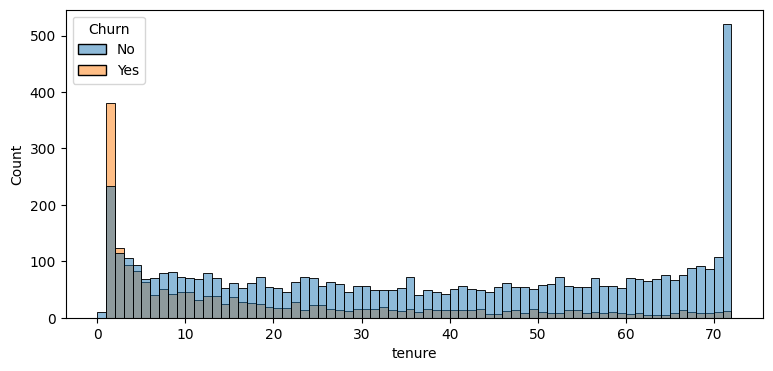

In [103]:
# let us look at churned out on the basis of tenure
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn") 
# here we knew that the max val was 72,hence bins is 72
# adding hue for churns 
plt.show()

`Observations`
- Customers who have churned out in the intial days or start of the month is higher than any other months
- Hence customers who have used our services more than a month have mostly stayed and customers who have used our services for one or two months have churned

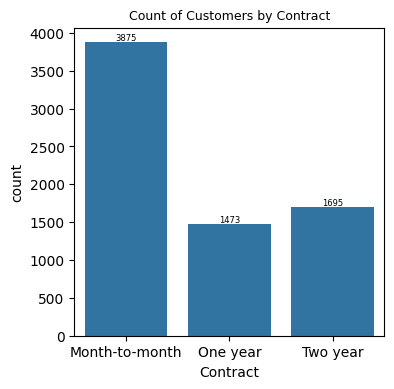

In [107]:
# Let us do an analysis on the basis of contract
# let us get the count of customers on the basis of contract 
## (just like we counted senior citizens)

plt.figure(figsize = (4,4)) # resizing the image
ax = sns.countplot(x = "Contract", data = df)
ax.bar_label(ax.containers[0], fontsize = 6)
plt.title("Count of Customers by Contract", fontsize = 9)
plt.show()

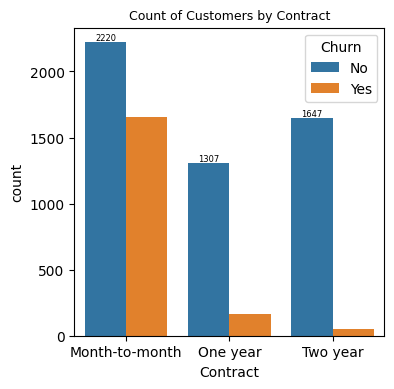

In [108]:
# adding churn in hue

plt.figure(figsize = (4,4)) # resizing the image
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0], fontsize = 6)
plt.title("Count of Customers by Contract", fontsize = 9)
plt.show()

`Observations`

- Generally customers who have stayed for month to month have churnedout more than the customers who have a year long or two year long contract 

In [110]:
# getting the col 
df.columns
# let us segregate the service columns from these and do something

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

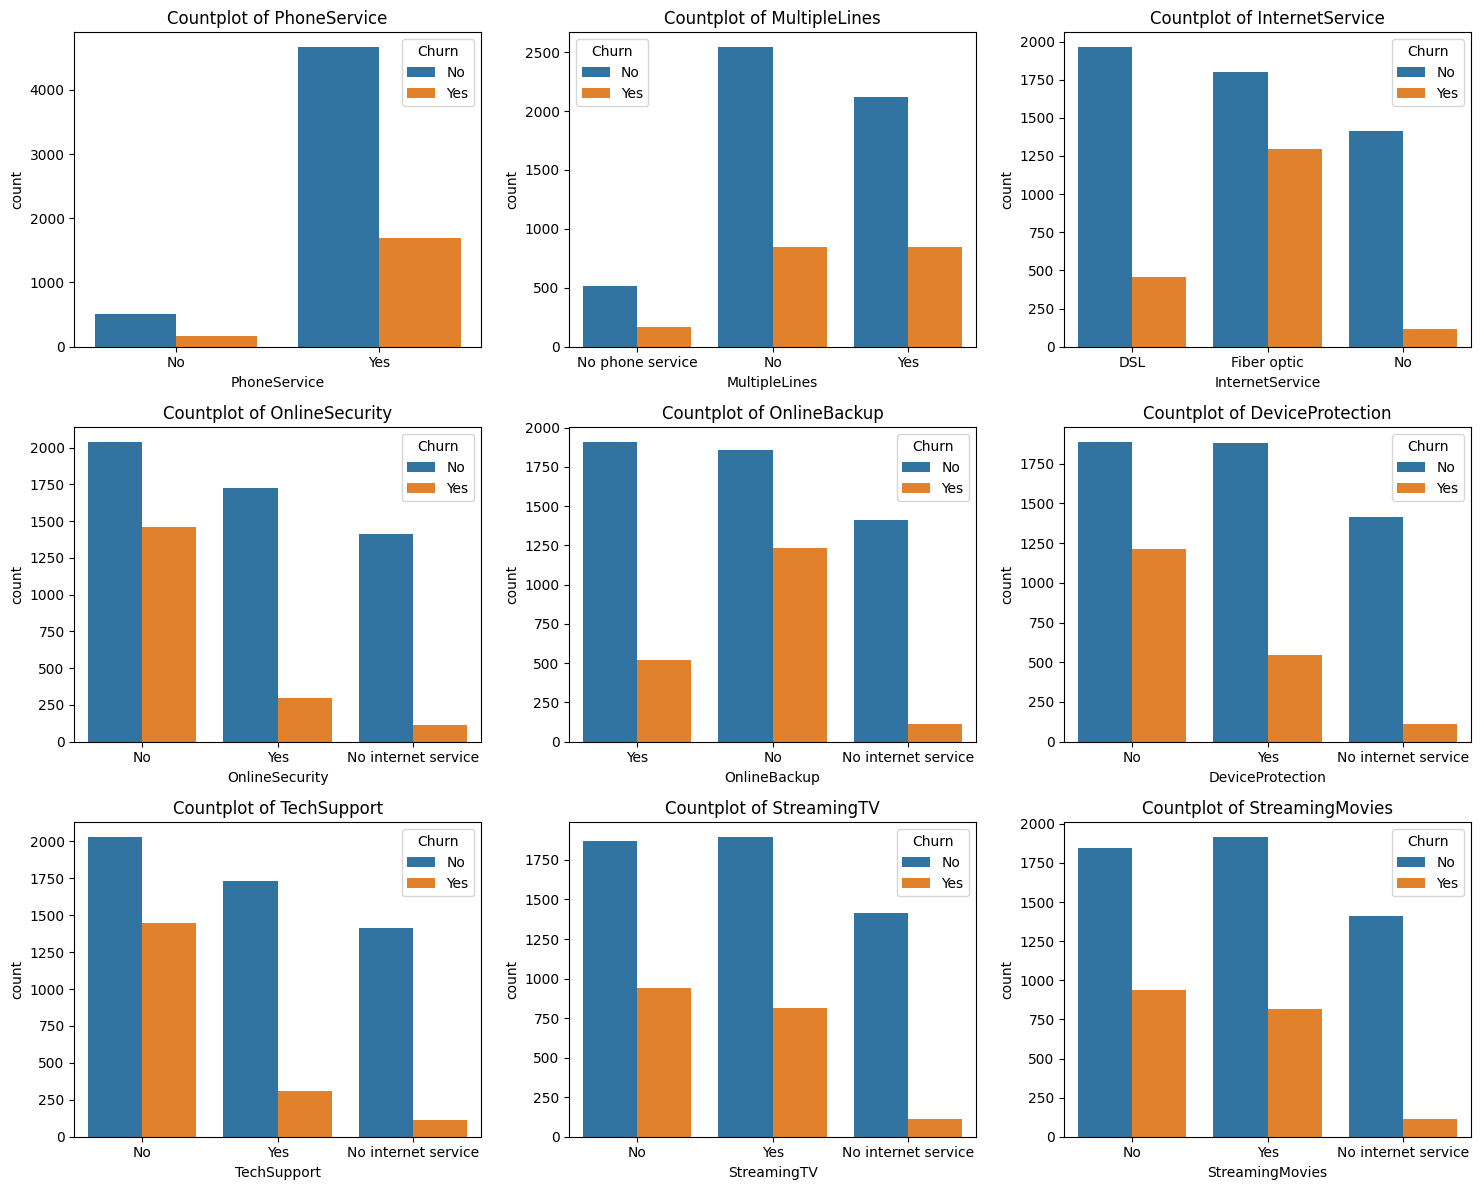

In [112]:
# List of columns you want to create countplots for

columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Setting up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12)) # 3 rows and 3 columns grid

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through the columns and create a countplot for each
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue = "Churn") # added hue too
    axes[i].set_title(f'Countplot of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

`Observations`
- **PhoneService**: 
  - Majority of customers with phone service did not churn.
  - Small proportion of churn observed for those with and without phone service.

- **MultipleLines**: 
  - More churn observed in customers with multiple lines compared to those without.

- **InternetService**: 
  - Higher churn rate for customers with fiber optic internet.
  - Lower churn observed for DSL and no internet service.

- **OnlineSecurity**: 
  - Significant churn for customers without online security services.

- **OnlineBackup**: 
  - Higher churn in customers without online backup services compared to those who have it.

- **DeviceProtection**: 
  - Customers without device protection show higher churn rates.

- **TechSupport**: 
  - Similar pattern to online security, where lack of tech support leads to higher churn.

- **StreamingTV and StreamingMovies**: 
  - Churn is higher for customers with streaming services compared to those without or with no internet.


## Creating Countplots in Subplots

### Objective
Visualize the count of customers for different phone and internet services by creating separate countplots for each service in a grid format.

### Steps

1. **List the Columns**: Identify the columns to visualize.
2. **Set Up Subplots**: Create a grid of subplots for the plots.
3. **Create Countplots**: Loop through the columns to create countplots for each one.

### Example Code

```python

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 3x3 grid for the plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes for easy looping
axes = axes.flatten()

# Loop through each column and create a countplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i])  # Create the countplot
    axes[i].set_title(f'Countplot of {column}')    # Add a title

# Adjust layout for better spacing
plt.tight_layout()

# Show all the plots
plt.show()


## Explanation of the Code

### List of Columns
A list called **`columns`** is created that includes the names of the services to visualize. These represent the different customer services (e.g., `'PhoneService'`, `'MultipleLines'`, etc.).

### Create Subplots
- **`plt.subplots(nrows=3, ncols=3, figsize=(15, 12))`**: This line creates a grid of subplots with 3 rows and 3 columns, providing space for 9 plots. The `figsize` parameter sets the overall size of the figure.

### Flatten the Axes
- **`axes = axes.flatten()`**: This converts the 2D array of axes into a 1D array, making it easier to loop through each subplot when creating the countplots.

### Create Countplots
The `for` loop iterates through each column in the **`columns`** list:
- **`sns.countplot(x=column, data=df, ax=axes[i])`**: This line creates a countplot for the current column, using the data from **`df`**, and places the plot in the corresponding subplot (**`axes[i]`**).
- **`axes[i].set_title(f'Countplot of {column}')`**: This line adds a title to each subplot for clarity, indicating which service the countplot represents.

### Adjust Layout
- **`plt.tight_layout()`**: This function adjusts the spacing between plots so that they don't overlap, ensuring a clean and organized layout.

### Show the Plots
- **`plt.show()`**: This command displays all the countplots at once.


-- -

In [113]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


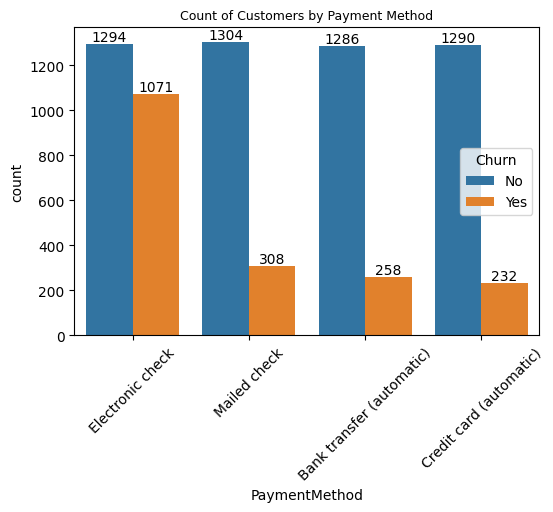

In [118]:
# let us use payment method to analyse


plt.figure(figsize = (6,4)) # resizing the image
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment Method", fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

`Observations`
 - Electronic checks have the most number of churned out customers as compared to others
 - Mainly, we can also observe that automatic payments made have less churn outs